# Use Cases
##### Below are four data-science use cases with each using different data types and analytical techniques. We will then focus on one of the use cases in more detail.

# Use Case 1 – Forecasting Demand for Hotel Rooms and/or Charter Flights (Time Series Forecasting)

### Business problem:
Predict occupancy rates and flight bookings 1–12 months ahead.

### Data used:
Historical daily/weekly occupancy %, bookings per day, cancellations, promotions, seasonality, regional events.

### Techniques:

Time Series Decomposition (trend, seasonality, residuals)

ARIMA / SARIMA

### Business Value:
Better pricing, staffing decisions, fuel planning for flights, inventory optimisation.

# Use Case 2 – Customer Churn Prediction for Hotels & Car Rentals (Classification / Prediction)

### Business problem:
Identify customers likely to stop booking with V.Ger within the next 6 months.

### Data used:
CRM logs, past booking frequency, complaints, use of promotions, NPS score, spend, demographics.

### Techniques:

Logistic Regression


### Business Value:
Targeted retention campaigns -> reduced churn -> increased customer lifetime value.

# Use Case 3 – A/B Testing of Website Layout and Promotion Designs (Experimental Analysis)

### Business problem:
Increase online booking conversion by comparing website designs.

### Data used:
Click-through rates, time on page, heatmaps, conversion rates, number of abandoned carts.

### Techniques:

Hypothesis testing (t-test, chi-squared)

### Business Value:
Improves booking efficiency and maximises revenue from web traffic.

# Use Case 4 – Customer Satisfaction Analysis for Hotels (Regression)

### Business problem:
Understand which factors (cleanliness, staff rating, price, Wi-Fi quality, room type) influence customer satisfaction the most.

### Data used:
Survey responses, star ratings, reviews.

### Techniques:

Regression models 

### Business Value:
Prioritising improvements that actually drive satisfaction -> more 5-star reviews -> increased demand.

# Chosen Case for detailed analysis - CASE 1: Forecasting Demand for Hotel Rooms 

## Business Objectives

Hotel operators rely heavily on their ability to anticipate future occupancy levels. Demand in the hospitality sector is influenced by many factors, such as tourism cycles, seasonal events, economic conditions, and long-term growth in the local market. Without accurate forecasting, hotels risk understaffing during busy periods, overstaffing during quieter months, inefficient allocation of resources, and suboptimal pricing decisions.

By modelling hotel occupancy as a time series, businesses can gain access to a forward-looking view of demand patterns. This insight enables a number of operational and strategic advantages:

##### Operational Benefits

- Staffing efficiency: Anticipate peak and off-peak months to adjust employee schedules and avoid unnecessary labour costs.

- Inventory and resource planning: Ensure adequate housekeeping staff, catering supplies, and amenities based on expected occupancy.

- Maintenance scheduling: Align refurbishment and maintenance work with predicted low-occupancy periods.

##### Strategic and Financial Benefits

- Revenue management: Use occupancy forecasts to inform room pricing strategies and maximise revenue per available room (RevPAR).

- Marketing and promotions: Launch targeted campaigns during months where future occupancy is predicted to be lower.

- Budgeting and forecasting: Improve financial planning by projecting revenue and operational costs more accurately.

##### Project Objectives

The main objective of this project is to develop and evaluate a data-focused forecasting model which is capable of predicting monthly hotel occupancy rates. The specific goals are:

- To generate a synthetic time-series dataset that reflects realistic hotel occupancy behaviour, including trend, seasonality, and noise.

- Analyse the dataset using decomposition, ACF, and PACF to understand its fundamental properties.

- Apply and compare autoregressive models to identify a suitable AR order.

- Fit an Auto-ARIMA model to automatically select the best parameters based on information criteria.

- Produce a 24-month forecast and interpret the predictions.

- Provide recommendations on how hotels could use forecasting outputs to support business performance.


## Creating a Synthetic Time Series Dataset

Using the provided TS_generation.ipynb, I have generated a time series dataset and saved it to generated_time_series.csv.

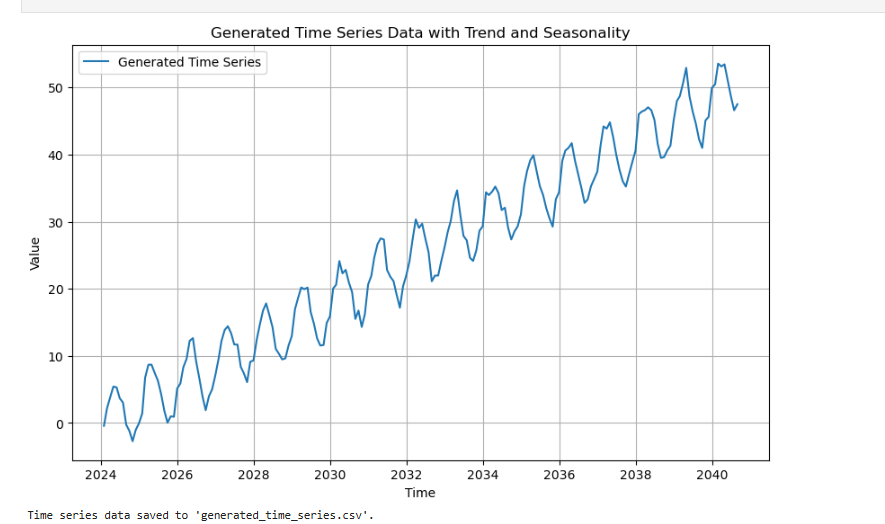
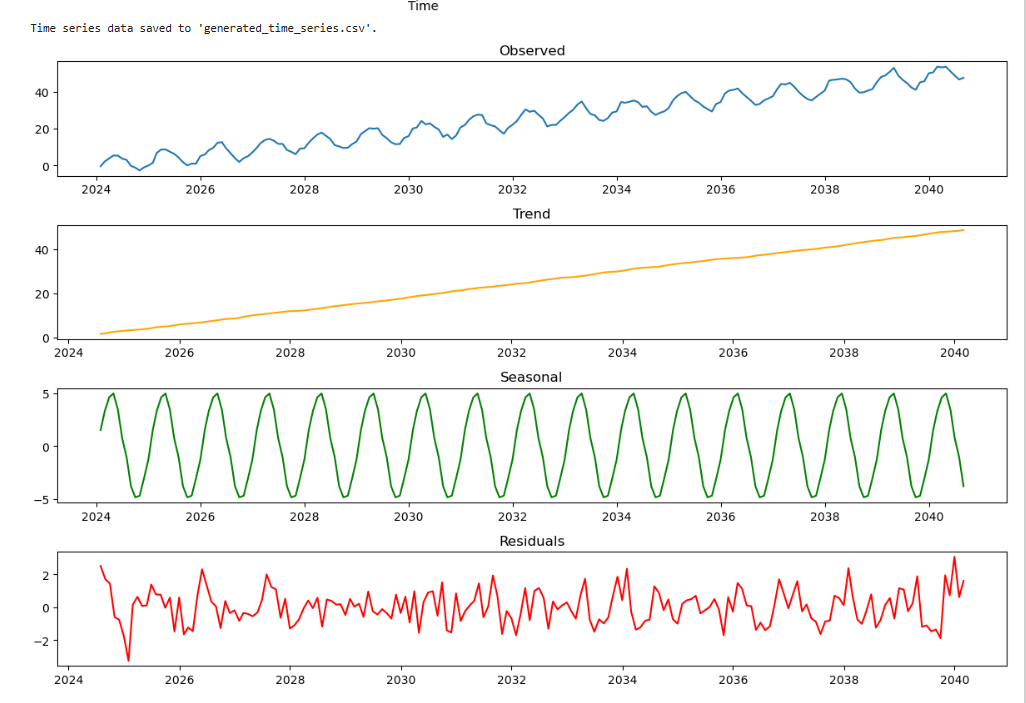
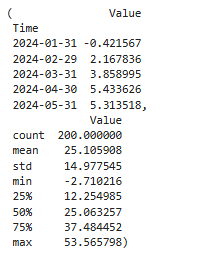

## Dataset Overview
A virtual time series dataset was generated using the code provided in TS_generation.ipynb, to simulate real-world hotel occupancy behaviour.
To support the hotel occupancy forecasting use case, the synthetic time-series dataset was generated to replicate realistic monthly occupancy patterns over a ≈16-year period (2024–2040). The dataset contains 200 monthly observations within 2 columns; Time(last day of each month) and the value which represents the percentage occupancy of the hotel.

### Data Generation Process
The dataset contains three essential components commonly observed in real hotel demand:

-  Long-term trend - A positive linear trend was added to simulate gradual growth in hotel demand over time.
-  Seasonality - This models recurring peaks and troughs typically associated with holiday seasons, summer tourism, and off-peak months.
-  Random noise - This represents unexpected cancellations, weather effects, competitor activity, or economic changes.

The frequency of the dataset is monthly, which is typical with hotel reports and ensures that seasonal effects (such as summer peaks or winter lows) are captured clearly.

### Initial Visualisation
Plotting the generated dataset revealed the following characteristics:

A line plot of the entire dataset shows:
-  A clear upward trend across the 200-month period
-  Strong seasonal peaks and troughs, recurring every 12 months
-  Consistent amplitude in seasonal variation

### Basic descriptive statistics which further support the visual findings:
-  Mean occupancy: ≈25%
-  Range of ≈-2.71 to ≈53.57
-  Standard Deviation: ≈14.98
-  
Because the dataset is synthetically generated, the additive noise component occasionally produces slightly negative values in the early parts of the series. Although hotel occupancy cannot be negative in practice, these values pose no issue for the time-series modelling process, since ARIMA-based models operate on numeric patterns rather than absolute physical constraints. Negative values occur only at the start of the series and do not affect the trend, decomposition, or forecasting performance.

### Time Series Decomposition
An additive decomposition was applied to split the series into three components:
* Trend component
  -  Smooth upward pattern
  -  Confirms long-term growth

- Seasonal component
  -  Identical pattern every 12 months
  -  Peaks typically occur in mid-year months
  -  Suggests recurring high-demand periods

- Residual component
  -  Appears random and centred around zero
  -  Shows no obvious structure

The decomposition validates the assumptions behind ARIMA modelling.

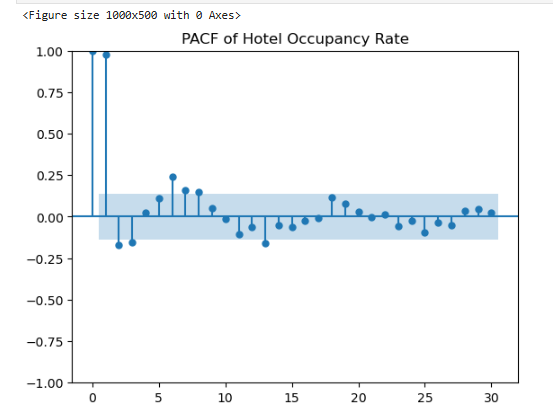

Autocorrelation analysis provides insight into how past occupancy values influence future values.

The Partial Autocorrelation Function (PACF) plot for the Hotel Occupancy Rate shows two clear and highly significant spikes at lags 0 and 1, indicating strong short-term autocorrelation. Most subsequent lags fall within the confidence interval apart from small positive spikes at lags 5,6,7 and small negative spikes at lag 2,3. However, a small negative spike appears at lag 12 which dips just below the lower confidence bound. Although this effect is weaker than the short-term lags, it is still statistically significant and is consistent with the annual (12-month) seasonality observed in the decomposition plot.

This behaviour occurs because the dataset contains a strong linear trend while the seasonal amplitude is comparatively smaller, which reduces the influence of seasonal spikes in the PACF. Therefore, based on the PACF, suitable AR orders to test include p = 1 and p = 5 (short-term dependence), and p = 12 to capture the weaker but still meaningful annual seasonal effect.

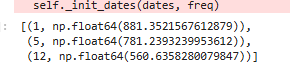

Autoregressive modelling was used as an initial approach to capture short-term dependencies in the hotel occupancy series. 

Autoregressive models with lag orders p = 1, 5, and 12 were fitted based on the PACF interpretation. Their AIC values were AR(1) = 881.35, AR(5) = 781.24, and AR(12) = 560.64. Since the lowest AIC value indicates the best trade-off between fit and model complexity, the AR(12) model provides the best performance. This result supports the presence of a weaker but statistically significant 12-month seasonal dependency in the occupancy rate, consistent with the PACF spike at lag 12 and the annual seasonality observed in the decomposition plot.

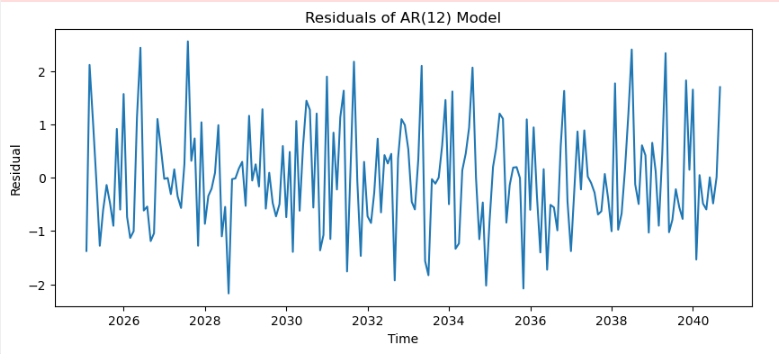

The residual plot for the AR(12) model shows that the residuals fluctuate randomly around zero with no visible trend or long-term structure. This indicates that the AR(12) model has successfully captured the main components of the time series, including the upward trend and the annual seasonal pattern. The residuals do not display systematic patterns or repeated cycles, which suggests that the model has removed most of the autocorrelation present in the original data. Although there are occasional spikes, these are consistent with the noise level used when generating the synthetic dataset and do not represent significant modelling issues. Overall, the residuals appear random, therefore supporting the suitability of the AR(12) model.

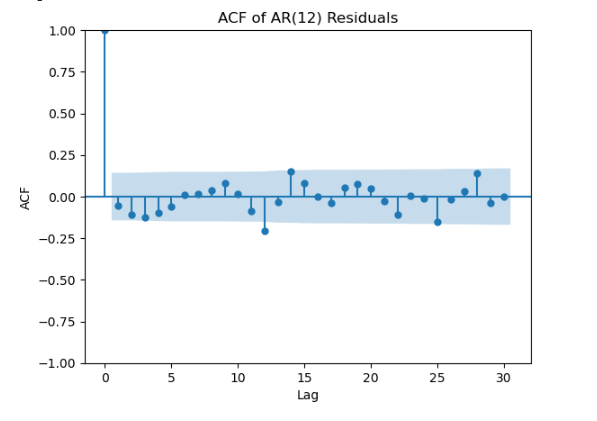
While a few very small spikes (e.g, at lags 12 and 14) fall slightly outside the confidence interval, these deviations are minor, isolated, and expected when analysing white-noise processes. There is no repeating pattern, no clustering, and no seasonal autocorrelation present. Overall, the ACF plot shows that the residuals are essentially uncorrelated, indicating that the AR(12) model has adequately captured the underlying structure of the time series. The absence of meaningful autocorrelation confirms that the residuals behave like white noise and that no additional AR terms are required.

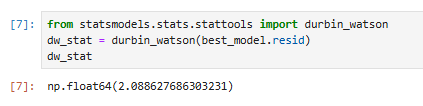
To further assess whether the AR(12) model left any autocorrelation in the residuals, the Durbin–Watson statistic was calculated. The model produced a value of DW = 2.089, which is extremely close to the ideal value of 2. This indicates no evidence of residual autocorrelation, meaning that the AR(12) model successfully captured the temporal dependence in the original series. Together with the residual ACF plot, this provides strong confirmation that the AR(12) model is appropriate.

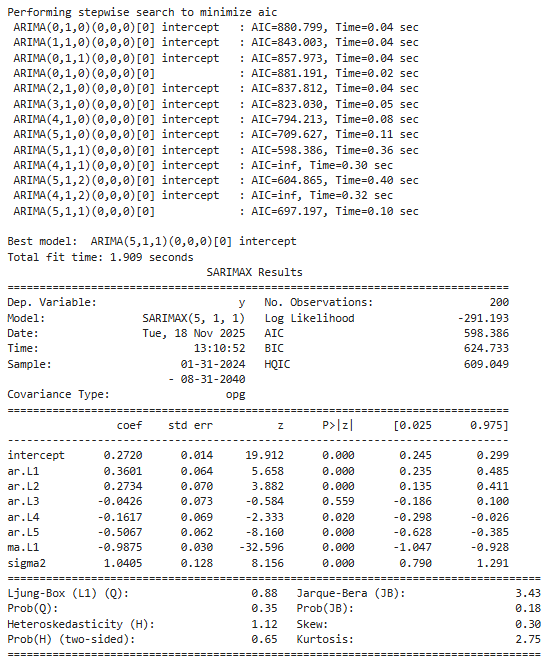
While autoregressive models provide a useful baseline, they are limited in their ability to model both trend and seasonality simultaneously. To capture the full structure of the hotel occupancy series, an Auto-ARIMA model was fitted using the pmdarima.auto_arima function. This method automates the selection of the optimal ARIMA model by testing multiple combinations of parameters and choosing the one that minimises the Akaike Information Criterion (AIC). 

Auto-ARIMA was selected as it automatically determines the optimal level of differencing needed to remove seasonal trend and trend. It explores all combinations of AR, moving average and seasonal components and chooses the best performing model. This makes Auto-ARIMA especially suitable for forecasting problems where trend and seasonality coexist such as within hotel occupancy.

The algorithm selected an ARIMA(5,1,1) model, indicating that a first difference was required to remove the strong linear trend present in the original series. The resulting model includes significant autoregressive terms at lags 1, 2, and 5, as well as a significant moving-average term at lag 1 (all p < 0.01). This confirms the presence of short-term dependency consistent with the earlier PACF analysis.

Model diagnostics support the use of the ARIMA(5,1,1) model:

- Ljung-Box Test (Q = 8.04, p = 0.35)
  -  p = 0.35 > 0.05 so we fail to reject the null so residuals behave like white noise

- Jarque-Bera (JB = 3.43, p = 0.18)
  - p = 0.18 so residuals are approximately normal

Overall, the ARIMA(5,1,1) model provides a statistically sound and well-fitting representation of the time series.

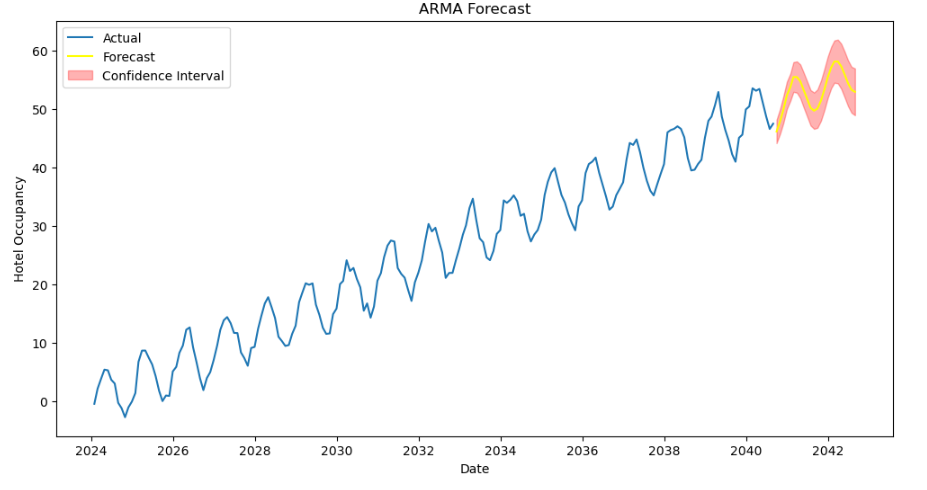
The ARIMA forecast extends the hotel occupancy rate for the next 24 months beyond the available historical data. The model captures the two key patterns present in the original time series: a strong upward long-term trend and a clear seasonal cycle.

The forecasted values continue this behaviour, showing steadily increasing occupancy levels over time, consistent with the linear trend component observed in the decomposition analysis. The seasonal pattern also persists, with regular peaks and troughs that mirror the annual seasonality present in the historical data. This indicates that the ARIMA(5,1,1) model has successfully learned both the short-term autocorrelation structure and the seasonal dynamics of the time series.

The confidence interval (shaded red region) widens gradually as the forecast horizon increases. This widening is expected: uncertainty naturally grows the further the model predicts into the future. However, the interval remains reasonably narrow, suggesting the model is stable and that the underlying pattern of the data is predictable. The forecast line remains well within realistic bounds, showing no signs of divergence or instability.

Overall, the ARIMA forecast provides a plausible and coherent projection of future hotel occupancy. For the business context of V.Ger Travel, this forecast would allow the company to anticipate demand several months ahead, enabling more informed planning for staffing, promotions, resource allocation, and capacity management.

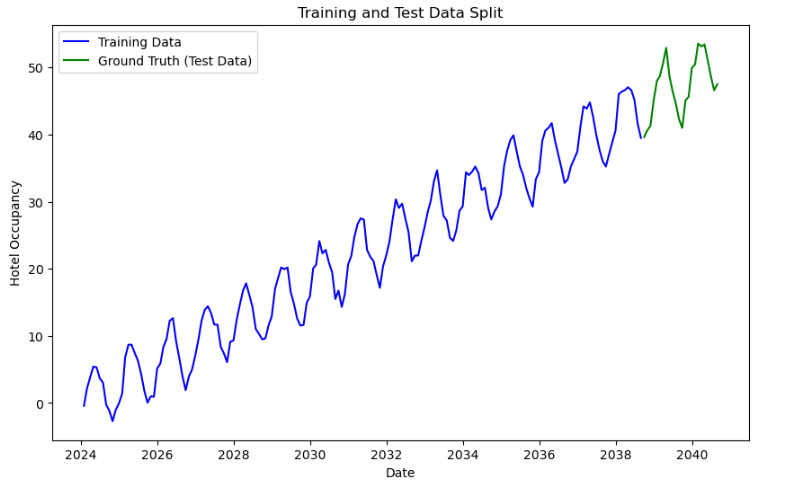
The training–test split divides the generated hotel occupancy rate dataset into two sections: a long training period covering almost the entire time span from 2024 to 2039, and a 24-month test period covering 2040–2041. The training portion (blue) captures the full upward trend and recurring seasonal pattern of the series, ensuring that the model has access to several years of historical cycles. The test portion (green) contains the final two years of observations, which show the same rising trend and seasonal fluctuations. Visually, the split is appropriate: the test window is large enough to meaningfully evaluate forecasting performance, but not so large that the model is deprived of historical context. The clear continuity in patterns between the training and test sets indicates that the underlying data-generating process remains stable, making this split well-suited for assessing the model’s ability to generalise to future periods.

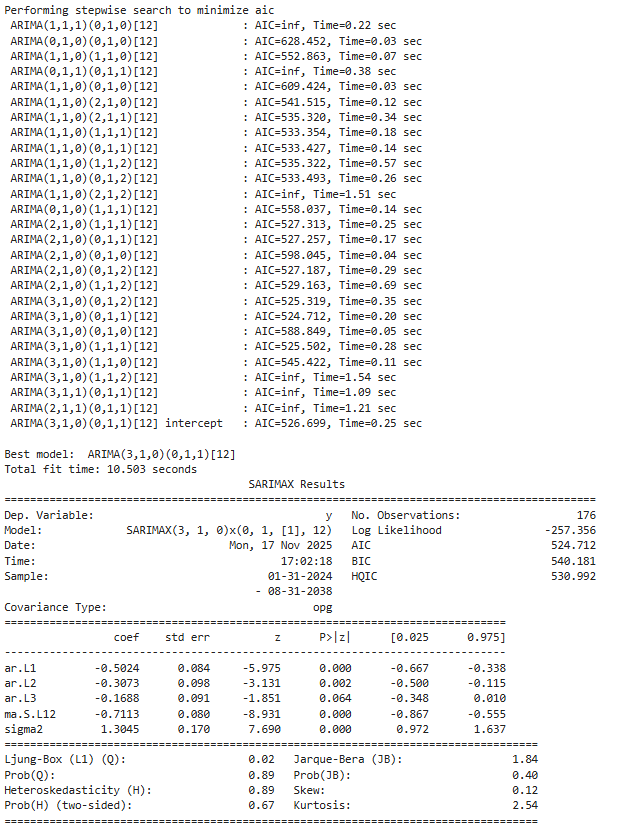
To capture both the trend and seasonal structure present in the hotel occupancy time series, a Seasonal ARIMA (SARIMA) model was fitted using Auto-ARIMA. The search space included non-seasonal orders up to ARIMA(3,1,3) and seasonal components with a 12-month period, which reflects the annual seasonality intentionally built into the dataset. 

After performing the stepwise search, the algorithm selected SARIMA(3,1,0)(0,1,1)[12] as the best-performing model, with the lowest AIC value of 524.712. 

##### Results:
- All three AR terms are statistically significant, confirming strong short-term autocorrelation.
- The seasonal MA term is also highly significant, confirming a strong year-over-year seasonal relationship.
- Ljung–Box Q-test (p = 0.80 > 0.05) indicates no significant autocorrelation remaining in the residuals. This means the model has successfully captured the serial dependency structure.
- Jarque–Bera test (p = 0.48 > 0.05) suggests that residuals do not deviate significantly from normality—an assumption required for reliable confidence intervals.

In [1]:
## Sarimax? / Conclusion

# Appendix

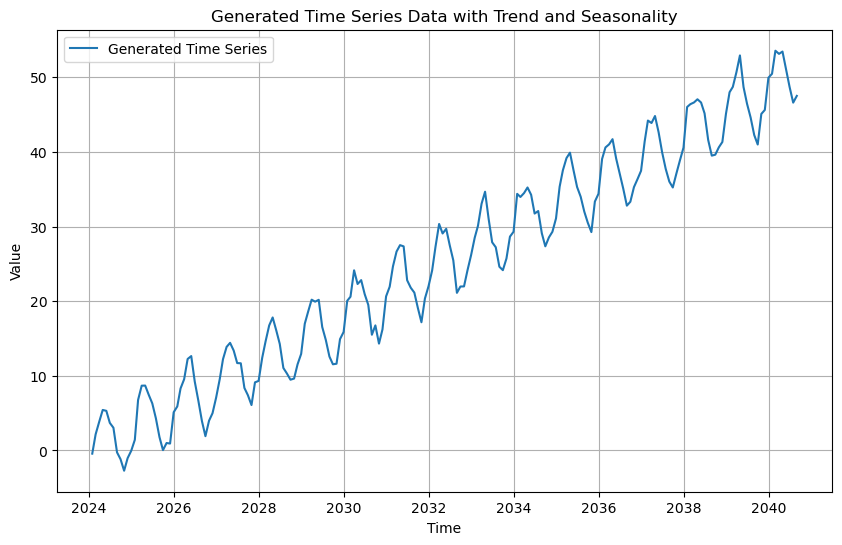

Time series data saved to 'generated_time_series.csv'.


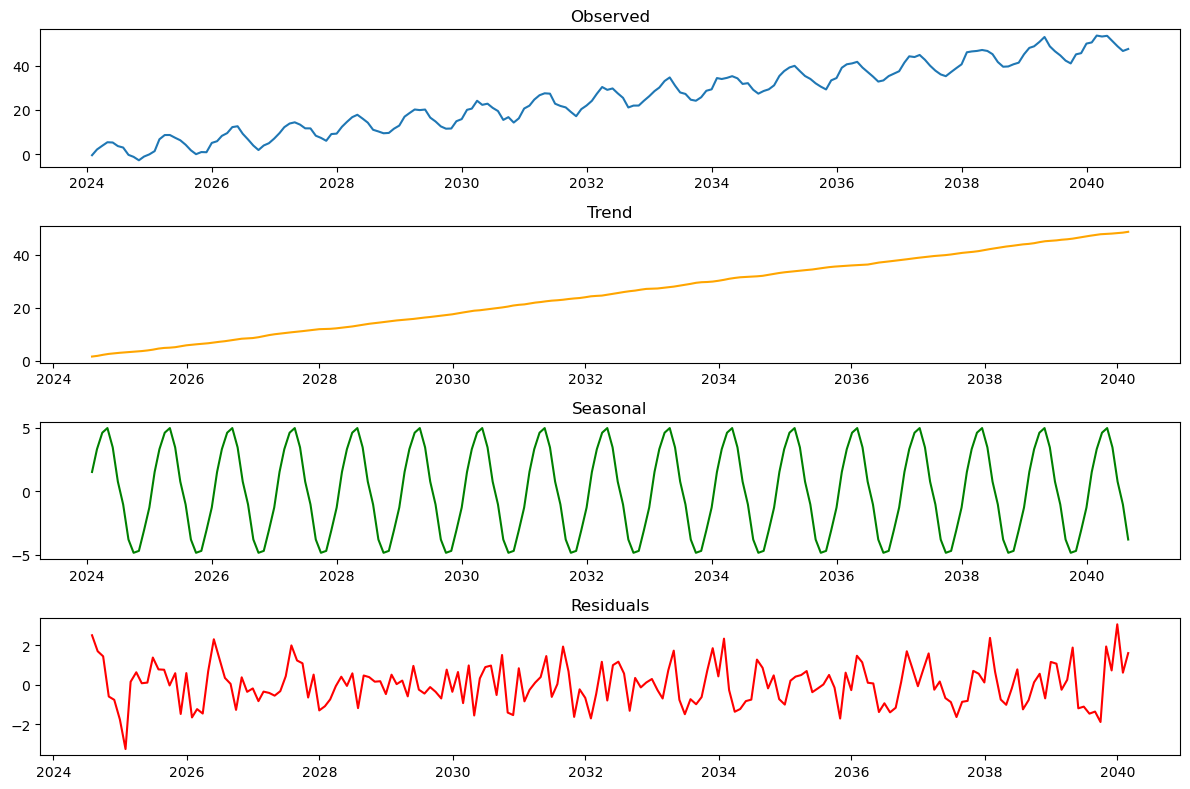

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def generate_time_series(n_periods=100, frequency='days', trend_slope=0.3, seasonal_period='monthly', seasonal_amplitude=5, noise_level=0.5):
    # Set frequency based on the input (days, months, or weeks)
    if frequency == 'days':
        freq = 'D'
        time_index = pd.date_range(start='2024-01-01', periods=n_periods, freq=freq)
    elif frequency == 'months':
        freq = 'ME'
        time_index = pd.date_range(start='2024-01-01', periods=n_periods, freq=freq)
    elif frequency == 'weeks':
        freq = 'W'
        time_index = pd.date_range(start='2024-01-01', periods=n_periods, freq=freq)
    else:
        raise ValueError("Frequency should be 'days', 'months', or 'weeks'.")

    # 1. Create a linear trend: A simple increasing trend from 0 to trend_slope * n_periods
    trend = np.linspace(0, trend_slope * n_periods, n_periods)  # Linear trend

    # 2. Add seasonality based on the chosen period (weekly, monthly, or annual)
    seasonal_component = np.zeros(n_periods)
    if seasonal_period == 'monthly':
        # One full cycle per year (12 months)
        seasonal_frequency = 2 * np.pi / 12  # For monthly frequency
    elif seasonal_period == 'weekly':
        # One full cycle per year (52 weeks)
        seasonal_frequency = 2 * np.pi / 52  # For weekly frequency
    elif seasonal_period == 'annual':
        # One full cycle per year (365 days)
        seasonal_frequency = 2 * np.pi / 365  # For annual frequency
    else:
        raise ValueError("Seasonal period should be 'monthly', 'weekly', or 'annual'.")

    # Smooth seasonal component (sine wave with the defined frequency)
    seasonal_component = seasonal_amplitude * np.sin(np.linspace(0, seasonal_frequency * n_periods, n_periods))

    # 3. Add minimal noise to the time series to make the residuals more realistic
    noise = np.random.normal(0, noise_level, n_periods)

    # 4. Combine the trend and seasonality
    time_series = trend + seasonal_component + noise

    # Prepare data for CSV output
    data = {'Time': time_index[:len(time_series)], 'Value': time_series}
    df = pd.DataFrame(data)

    # Plot the time series
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time'], df['Value'], label='Generated Time Series')
    plt.title('Generated Time Series Data with Trend and Seasonality')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Save to CSV
    df.to_csv('generated_time_series.csv', index=False)
    print("Time series data saved to 'generated_time_series.csv'.")

    return df

#
def decompose_time_series(df, frequency='D'):
    # Ensure the 'Time' column is in datetime format
    df['Time'] = pd.to_datetime(df['Time'])

    # Set 'Time' as the index
    df.set_index('Time', inplace=True)

    # Perform decomposition
    decomposition = seasonal_decompose(df['Value'], model='additive', period=365 if frequency == 'days' else 12)

    # Plot the decomposed components
    plt.figure(figsize=(12, 8))

    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.title('Observed')

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend', color='orange')
    plt.title('Trend')

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal', color='green')
    plt.title('Seasonal')

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals', color='red')
    plt.title('Residuals')

    plt.tight_layout()
    plt.show()

# Example usage of the function
df = generate_time_series(n_periods=200, frequency='months', trend_slope=0.25, seasonal_period='monthly', seasonal_amplitude=5, noise_level=0.9)

decompose_time_series(df)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("generated_time_series.csv")

df['Time'] = pd.to_datetime(df['Time'])
df = df.sort_values("Time")
df.set_index("Time", inplace=True)

df.head(), df.describe()

(               Value
 Time                
 2024-01-31 -0.421567
 2024-02-29  2.167836
 2024-03-31  3.858995
 2024-04-30  5.433626
 2024-05-31  5.313518,
             Value
 count  200.000000
 mean    25.105908
 std     14.977545
 min     -2.710216
 25%     12.254985
 50%     25.063257
 75%     37.484452
 max     53.565798)

<Figure size 1000x500 with 0 Axes>

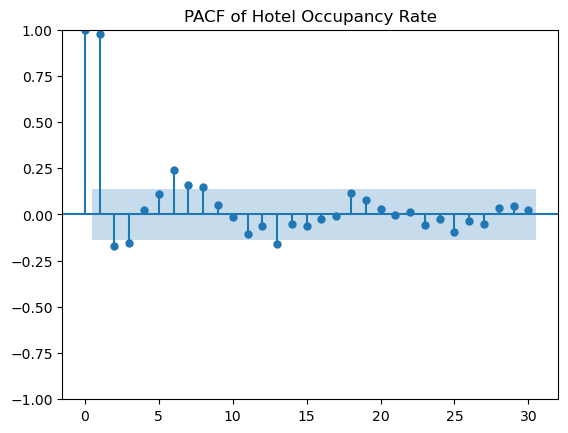

In [3]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10,5))
plot_pacf(df['Value'], lags=30, method='ywm')
plt.title("PACF of Hotel Occupancy Rate")
plt.show()


In [2]:
from statsmodels.tsa.ar_model import AutoReg

p_list = [1, 5, 12]
models = []

for p in p_list:
    model = AutoReg(df['Value'], lags=p, old_names=False).fit()
    models.append((p, model.aic))

models

C:\Users\JohnJ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\JohnJ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\JohnJ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


[(1, np.float64(881.3521567612879)),
 (5, np.float64(781.2393239953612)),
 (12, np.float64(560.6358280079847))]

C:\Users\JohnJ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


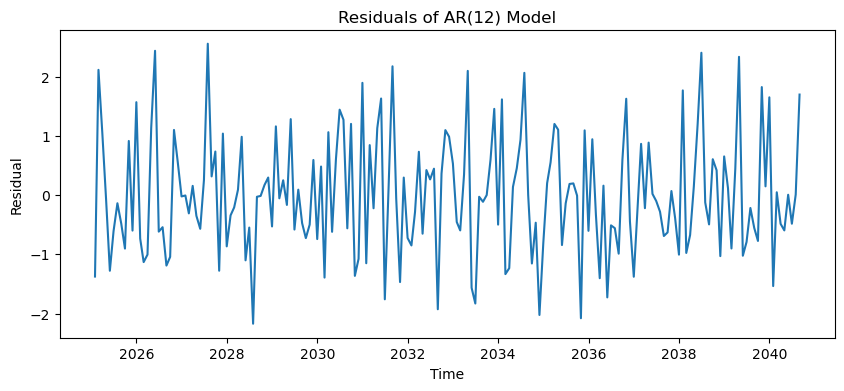

In [5]:
best_model = AutoReg(df['Value'], lags=12, old_names=False).fit()

plt.figure(figsize=(10,4))
plt.plot(best_model.resid)
plt.title("Residuals of AR(12) Model")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.show()

<Figure size 1000x400 with 0 Axes>

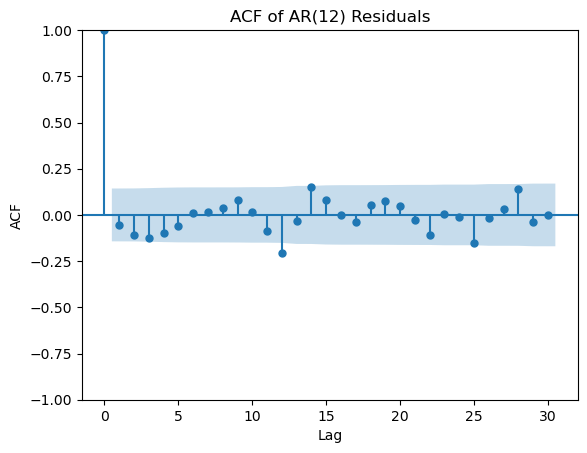

In [6]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10,4))
plot_acf(best_model.resid, lags=30)
plt.title("ACF of AR(12) Residuals")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

In [7]:
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(best_model.resid)
dw_stat

np.float64(2.088627686303231)

In [3]:
import pmdarima as pm

auto_arma = pm.auto_arima(
    df['Value'],
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    seasonal=False,
    trace=True,
    information_criterion='aic'
)

print(auto_arma.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=880.799, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=843.003, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=857.973, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=881.191, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=837.812, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=823.030, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=794.213, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=709.627, Time=0.11 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=598.386, Time=0.36 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=604.865, Time=0.40 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=697.197, Time=0.10 sec

Best model:  ARIMA(5,1,1)(0,0,0)[0] intercept
Total fit time: 1.909 seconds
                               SARIMAX Resu

C:\Users\JohnJ\AppData\Local\Temp\ipykernel_12236\2292694864.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_index = pd.date_range(df.index[-1], periods=n_forecast+1, freq='M')[1:]


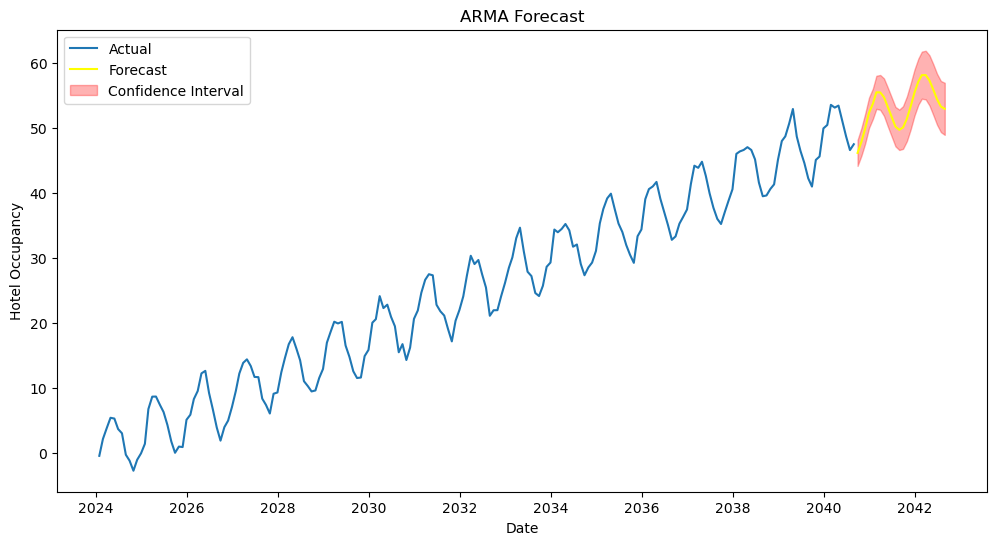

In [4]:
n_forecast = 24
forecast, conf_int = auto_arma.predict(n_periods=n_forecast, return_conf_int=True)

future_index = pd.date_range(df.index[-1], periods=n_forecast+1, freq='M')[1:]

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Value'], label="Actual")
plt.plot(future_index, forecast, label="Forecast", color='yellow')
plt.fill_between(future_index, conf_int[:,0], conf_int[:,1],
                 color='red', alpha=0.3, label="Confidence Interval")

plt.title("ARMA Forecast")
plt.xlabel("Date")
plt.ylabel("Hotel Occupancy")
plt.legend()
plt.show()

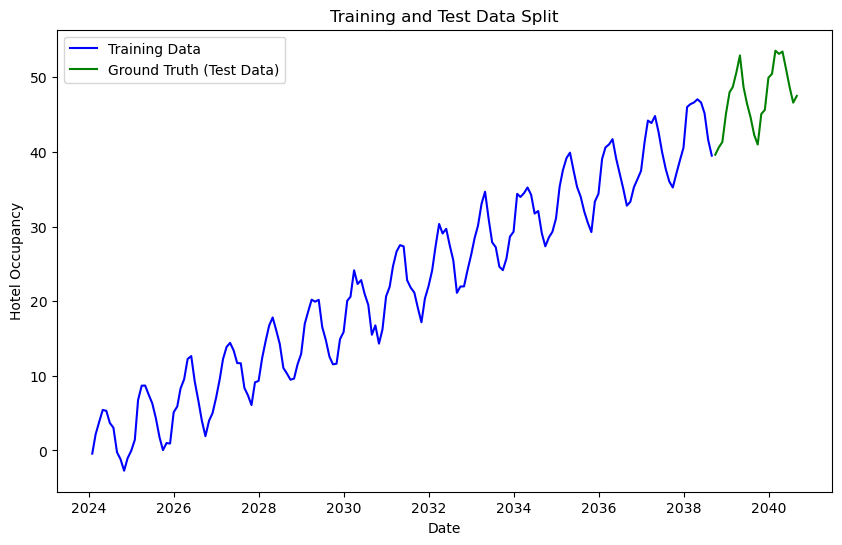

In [5]:
## Train/Test Split for Your Dataset
forecast_horizon = 24  

train_data = df[:-forecast_horizon]
test_data = df[-forecast_horizon:]

plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Value'], 
         label='Training Data', color='blue')

plt.plot(test_data.index, test_data['Value'], 
         label='Ground Truth (Test Data)', color='green')

plt.title('Training and Test Data Split')
plt.xlabel('Date')
plt.ylabel('Hotel Occupancy')
plt.legend()
plt.show()

In [19]:
sarima_model = pm.auto_arima(
    train_data['Value'],
    start_p=1, max_p=3,
    start_q=1, max_q=3,
    start_P=0, max_P=2,
    start_Q=0, max_Q=2,
    d=1,
    D=1,
    m=12,                 # monthly seasonality
    seasonal=True,
    stepwise=True,
    trace=True,
    information_criterion='aic'
)

print(sarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=628.452, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=552.863, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=609.424, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=541.515, Time=0.12 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=535.320, Time=0.34 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=533.354, Time=0.18 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=533.427, Time=0.14 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=535.322, Time=0.57 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=533.493, Time=0.26 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=1.51 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=558.037, Time=0.14 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=527.313, Time=0.25 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=52

In [6]:
### Sarimax model next - need to create another dataset for merge